In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load both COLVAR files
df_sim1 = pd.read_csv('COLVAR', delim_whitespace=True)
df_sim2 = pd.read_csv('bck.1.COLVAR', delim_whitespace=True)


In [3]:
# Display the first few rows to check the data structure
df_sim1.head()


,#!,FIELDS,time,phi,psi
0,#!,SET,min_phi,-pi,NaN
1,#!,SET,max_phi,pi,NaN
2,#!,SET,min_psi,-pi,NaN
3,#!,SET,max_psi,pi,NaN
4,0.000000,1.157159,0.000000,NaN,NaN


KeyError: 'TIME'

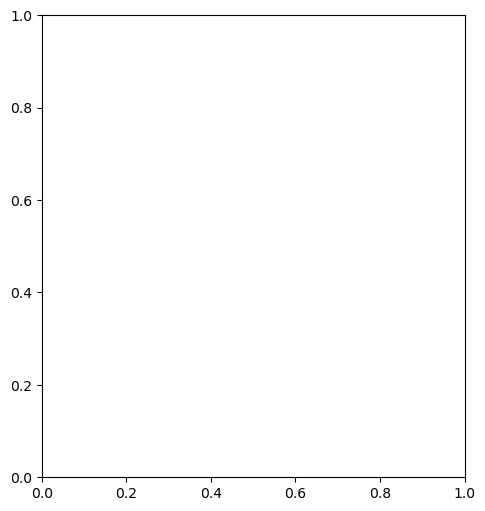

In [4]:
plt.figure(figsize=(12, 6))

# Plot phi and psi for the first simulation
plt.subplot(1, 2, 1)
plt.plot(df_sim1['TIME'], df_sim1['phi'], label='Phi')
plt.plot(df_sim1['TIME'], df_sim1['psi'], label='Psi')
plt.title('Dynamics of Phi and Psi - Simulation 1')
plt.xlabel('Time (steps)')
plt.ylabel('Dihedral Angles (Degrees)')
plt.legend()

# Plot phi and psi for the second simulation
plt.subplot(1, 2, 2)
plt.plot(df_sim2['TIME'], df_sim2['phi'], label='Phi')
plt.plot(df_sim2['TIME'], df_sim2['psi'], label='Psi')
plt.title('Dynamics of Phi and Psi - Simulation 2')
plt.xlabel('Time (steps)')
plt.ylabel('Dihedral Angles (Degrees)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Combine phi and psi into a 2D array
X_sim1 = df_sim1[['phi', 'psi']].values
X_sim2 = df_sim2[['phi', 'psi']].values

# Perform k-means clustering (choose number of clusters, e.g., 3)
kmeans_sim1 = KMeans(n_clusters=3)
kmeans_sim2 = KMeans(n_clusters=3)

# Fit the clustering
df_sim1['Cluster'] = kmeans_sim1.fit_predict(X_sim1)
df_sim2['Cluster'] = kmeans_sim2.fit_predict(X_sim2)

# Plot the clusters in the ϕ/ψ space
plt.figure(figsize=(12, 6))

# Plot for simulation 1
plt.subplot(1, 2, 1)
plt.scatter(df_sim1['phi'], df_sim1['psi'], c=df_sim1['Cluster'], cmap='viridis')
plt.title('ϕ / ψ Space - Simulation 1')
plt.xlabel('Phi')
plt.ylabel('Psi')

# Plot for simulation 2
plt.subplot(1, 2, 2)
plt.scatter(df_sim2['phi'], df_sim2['psi'], c=df_sim2['Cluster'], cmap='viridis')
plt.title('ϕ / ψ Space - Simulation 2')
plt.xlabel('Phi')
plt.ylabel('Psi')

plt.tight_layout()
plt.show()


In [ ]:
# For Simulation 1
for cluster_id in df_sim1['Cluster'].unique():
    cluster_data = df_sim1[df_sim1['Cluster'] == cluster_id]
    print(f'Cluster {cluster_id} - Phi: {cluster_data["phi"].std()}, Psi: {cluster_data["psi"].std()}')

# For Simulation 2
for cluster_id in df_sim2['Cluster'].unique():
    cluster_data = df_sim2[df_sim2['Cluster'] == cluster_id]
    print(f'Cluster {cluster_id} - Phi: {cluster_data["phi"].std()}, Psi: {cluster_data["psi"].std()}')


In [ ]:
pip install numpy matplotlib mdtraj


In [ ]:
import numpy as np

# Read COLVAR file
colvar_file = 'path/to/COLVAR'
colvar_data = np.loadtxt(colvar_file, skiprows=1)  # Skipping the header if it exists

# Assume phi and psi are columns 1 and 2 in the COLVAR file (adjust based on your file)
colvar_phi = colvar_data[:, 1]
colvar_psi = colvar_data[:, 2]

# Optionally, if there's a time column:
colvar_time = colvar_data[:, 0]


In [1]:
import mdtraj as md

# Load the PDB and XTC files
topology_file = 'dialaA.pdb'  # PDB file
trajectory_file = 'traj_comp.xtc'  # XTC file

# Load the trajectory
traj = md.load(trajectory_file, top=topology_file)

# Compute phi and psi dihedrals
phi_indices = md.compute_phi(traj)
psi_indices = md.compute_psi(traj)

# Extract the angles in radians and convert to degrees
phi_angles = md.compute_angles(traj, phi_indices) * 180 / np.pi
psi_angles = md.compute_angles(traj, psi_indices) * 180 / np.pi


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the PDB and XTC files
topology_file = 'dialaA.pdb'  # PDB file
trajectory_file = 'trajout.xtc'  # XTC file

# Load the trajectory
traj = md.load(trajectory_file, top=topology_file)

# Compute phi and psi dihedrals using MDTraj
phi_angles = md.compute_phi(traj)  # This returns angles directly
psi_angles = md.compute_psi(traj)  # This returns angles directly

# Convert the angles from radians to degrees
phi_angles_deg = phi_angles * 180 / np.pi
psi_angles_deg = psi_angles * 180 / np.pi

# Plot the dihedrals
plt.figure(figsize=(12, 6))

# Plot for the computed phi and psi
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(phi_angles_deg)) * traj.timestep / 1000, phi_angles_deg, label='Phi (XTC)', color='blue')
plt.plot(np.arange(len(psi_angles_deg)) * traj.timestep / 1000, psi_angles_deg, label='Psi (XTC)', color='red')
plt.title('Phi and Psi vs Time (XTC)')
plt.xlabel('Time (ns)')
plt.ylabel('Angle (degrees)')
plt.legend()

# Ramachandran-like Plot (Phi vs Psi)
plt.subplot(1, 2, 2)
plt.scatter(phi_angles_deg, psi_angles_deg, label='Phi vs Psi (XTC)', s=5, alpha=0.7, color='purple')
plt.title('Ramachandran-like Plot (Phi vs Psi)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.legend()

plt.tight_layout()
plt.show()

# Optionally, you can compute the standard deviation of phi and psi
std_phi = np.std(phi_angles_deg)
std_psi = np.std(psi_angles_deg)

print(f"Standard Deviation of Phi: {std_phi:.2f}")
print(f"Standard Deviation of Psi: {std_psi:.2f}")


OSError: No such file: trajout.xtc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the COLVAR file
colvar_file = 'COLVAR'

# Read the COLVAR file (assuming space-separated columns)
colvar_data = np.loadtxt(colvar_file, skiprows=1)  # Skipping header row if needed

# Assume columns:
# Column 0 = Time (in nanoseconds)
# Column 1 = Phi (ϕ) dihedral in degrees
# Column 2 = Psi (ψ) dihedral in degrees

colvar_time = colvar_data[:, 0]
colvar_phi = colvar_data[:, 1]
colvar_psi = colvar_data[:, 2]

# Plotting phi and psi from COLVAR
plt.figure(figsize=(12, 6))

# Plot phi and psi over time (COLVAR)
plt.subplot(1, 2, 1)
plt.plot(colvar_time, colvar_phi, label='Phi (COLVAR)', color='blue')
plt.plot(colvar_time, colvar_psi, label='Psi (COLVAR)', color='red')
plt.title('Phi and Psi vs Time (COLVAR)')
plt.xlabel('Time (ns)')
plt.ylabel('Angle (degrees)')
plt.legend()

# Ramachandran-like Plot (Phi vs Psi)
plt.subplot(1, 2, 2)
plt.scatter(colvar_phi, colvar_psi, label='COLVAR Data', s=5, alpha=0.7, color='green')
plt.title('Ramachandran-like Plot (Phi vs Psi)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.legend()

plt.tight_layout()
plt.show()


/ext3/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the COLVAR file
colvar_file = 'bck.1.COLVAR'

# Read the COLVAR file (assuming space-separated columns)
colvar_data = np.loadtxt(colvar_file, skiprows=1)  # Skipping header row if needed

# Assume columns:
# Column 0 = Time (in nanoseconds)
# Column 1 = Phi (ϕ) dihedral in degrees
# Column 2 = Psi (ψ) dihedral in degrees

colvar_time = colvar_data[:, 0]
colvar_phi = colvar_data[:, 1]
colvar_psi = colvar_data[:, 2]

# Plotting phi and psi from COLVAR
plt.figure(figsize=(12, 6))

# Plot phi and psi over time (COLVAR)
plt.subplot(1, 2, 1)
plt.plot(colvar_time, colvar_phi, label='Phi (COLVAR)', color='blue')
plt.plot(colvar_time, colvar_psi, label='Psi (COLVAR)', color='red')
plt.title('Phi and Psi vs Time (COLVAR)')
plt.xlabel('Time (ns)')
plt.ylabel('Angle (degrees)')
plt.legend()

# Ramachandran-like Plot (Phi vs Psi)
plt.subplot(1, 2, 2)
plt.scatter(colvar_phi, colvar_psi, label='COLVAR Data', s=5, alpha=0.7, color='green')
plt.title('Ramachandran-like Plot (Phi vs Psi)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.legend()

plt.tight_layout()
plt.show()


[[ 4  6  8 14]]
[[1.1571589 ]
 [1.0570375 ]
 [0.69265336]
 ...
 [1.2505863 ]
 [1.1524442 ]
 [1.2949666 ]]


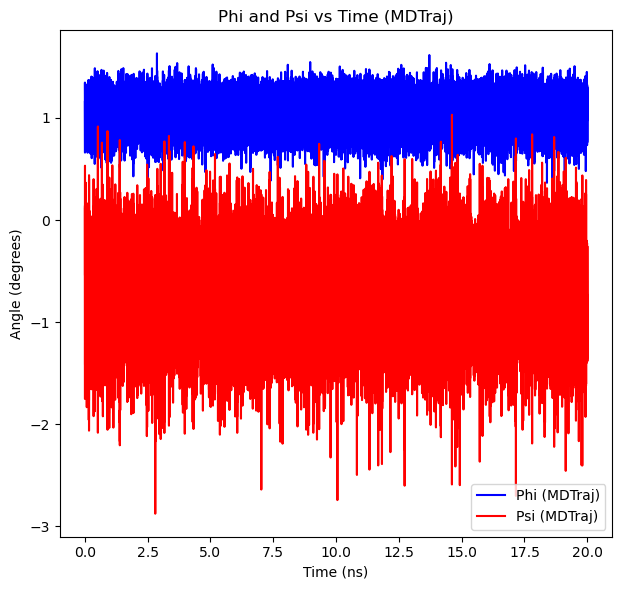

In [12]:
import mdtraj as md

# Load the PDB and XTC files for MDTraj (adjust path and filenames)
topology_file = 'dialaA.pdb'  # PDB file
trajectory_file = 'traj_comp.xtc'  # XTC file

# Load the trajectory
traj = md.load(trajectory_file, top=topology_file)

# Compute phi and psi dihedrals using MDTraj
phi_indices, phi= md.compute_phi(traj)  # Returns the indices of atoms forming the phi dihedrals
psi_indices, psi = md.compute_psi(traj)  # Returns the indices of atoms forming the psi dihedrals
print (phi_indices)
print (phi)

# Time points for the XTC trajectory
time_points_xtc = np.arange(len(phi)) * traj.timestep / 1000  # Convert to nanoseconds

# Plotting
plt.figure(figsize=(12, 6))

# Plot phi and psi over time (MDTraj data)
plt.subplot(1, 2, 1)
plt.plot(time_points_xtc, phi, label='Phi (MDTraj)', color='blue')
plt.plot(time_points_xtc, psi, label='Psi (MDTraj)', color='red')
plt.title('Phi and Psi vs Time (MDTraj)')
plt.xlabel('Time (ns)')
plt.ylabel('Angle (degrees)')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the PDB and XTC files for MDTraj (adjust path and filenames)
topology_file = 'dialaA.pdb'  # PDB file
trajectory_file = 'traj_comp.xtc'  # XTC file

# Load the trajectory
traj = md.load(trajectory_file, top=topology_file)

# Compute phi and psi dihedrals using MDTraj
phi_indices = md.compute_phi(traj)  # Returns the indices of atoms forming the phi dihedrals
psi_indices = md.compute_psi(traj)  # Returns the indices of atoms forming the psi dihedrals
print (phi_indices)
print (phi)
# Extract the angles in radians and convert to degrees
phi_angles = md.compute_angles(traj, phi_indices) * 180 / np.pi
psi_angles = md.compute_angles(traj, psi_indices) * 180 / np.pi

# Plot phi vs psi using scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(phi_angles, psi_angles, color='blue', s=1)  # Use a small point size
plt.title('Ramachandran Plot (Phi vs Psi)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.grid(True)

# Optionally, you can add contours or color the points based on other properties (like bias potential)
plt.show()


(array([[ 4,  6,  8, 14]]), array([[1.1571589 ],
       [1.0570375 ],
       [0.69265336],
       ...,
       [1.2505863 ],
       [1.1524442 ],
       [1.2949666 ]], dtype=float32))
[[1.1571589 ]
 [1.0570375 ]
 [0.69265336]
 ...
 [1.2505863 ]
 [1.1524442 ]
 [1.2949666 ]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

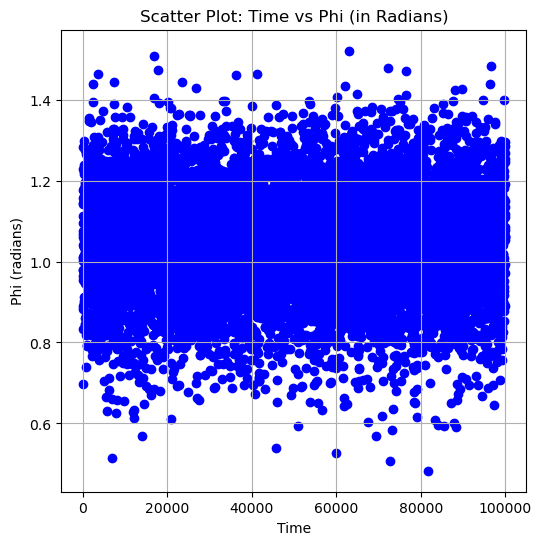

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# Load the data, skipping the comment lines that start with '#!'
data = np.loadtxt('COLVAR', comments='#!')

# Extract time and phi from the data
time = data[:, 0]  # first column (time)
phi = data[:, 1]   # second column (phi in radians)

# Create a scatter plot (Time vs Phi in radians)
plt.figure(figsize=(6, 6))
plt.scatter(time, phi, c='blue')

# Label axes
plt.xlabel('Time')
plt.ylabel('Phi (radians)')
plt.title('Scatter Plot: Time vs Phi (in Radians)')

# Display the plot
plt.grid(True)
plt.show()


In [21]:
import numpy as np

# Load the entire COLVAR data, skipping the comment lines that start with '#!'
data = np.loadtxt('COLVAR', comments='#!')

# Extract phi and psi from the data (both in radians)
phi = data[:, 1]  # second column (phi in radians)
psi = data[:, 2]  # third column (psi in radians)

# Compute the standard deviation of phi and psi
phi_std = np.std(phi)
psi_std = np.std(psi)

# Print the standard deviations
print(f"Standard deviation of phi: {phi_std}")
print(f"Standard deviation of psi: {psi_std}")


Standard deviation of phi: 0.13213973950615396
Standard deviation of psi: 0.0
